## KDE(Kernel Density Estimation)의 이해

**seaborn의 distplot()을 이용하여 KDE 시각화**  
https://seaborn.pydata.org/tutorial/distributions.html

In [101]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30) # 0에서 1까지 랜덤으로 30개
print(x)
print(x.shape)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
(30,)


In [102]:
plt.rcParams['figure.figsize']=(10,6)

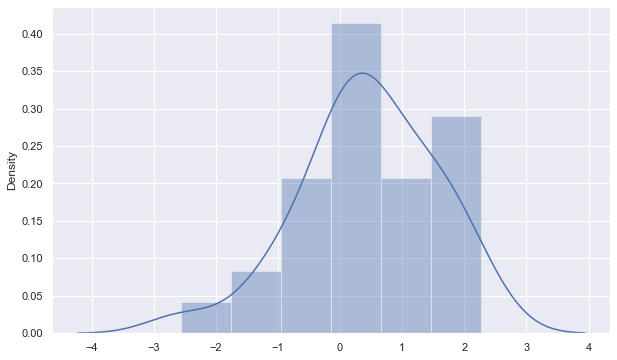

In [103]:
sns.distplot(x);

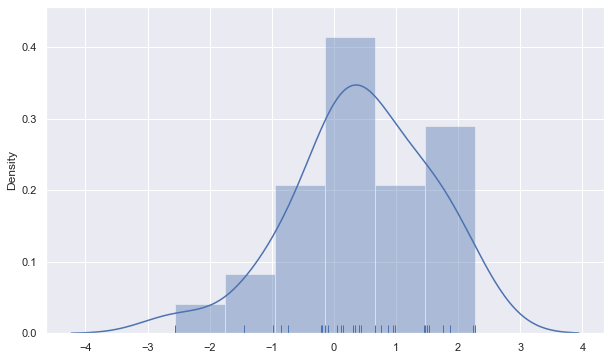

In [104]:
# rug=True : 값들의 밀집도를 알 수 있다.
sns.distplot(x, rug=True);plt.show()

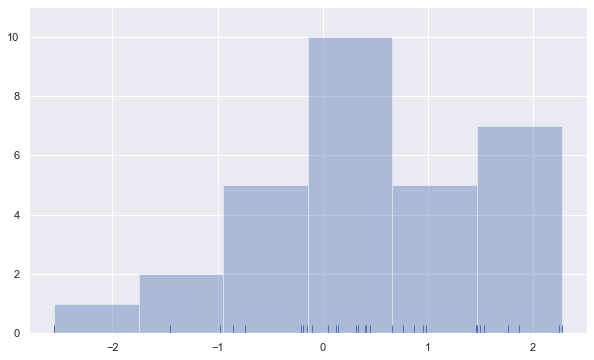

In [105]:
# kde를 False로 하면 히스토그램만 볼 수 있다.
sns.distplot(x, kde=False, rug=True);plt.show()

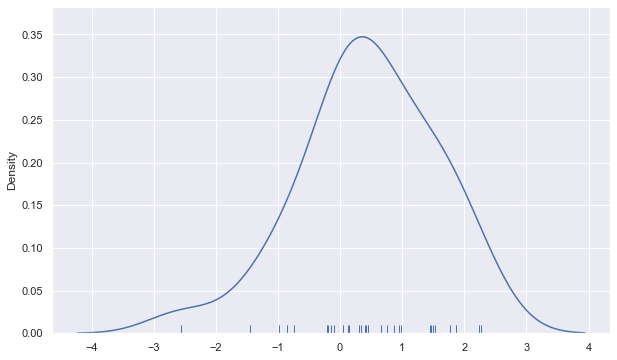

In [106]:
# hist=False하면 히스토그램을 빼고 볼 수 있다.
sns.distplot(x, hist=False, rug=True);plt.show()

### KDE
: 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한뒤, 데이터 건수로 나누어 확률 밀도 함수를 추정하는 방법.
<br>
<img src=https://blog.kakaocdn.net/dn/pSCkI/btrFAjTf7LS/WTDNnx6oNlB5QkE4Oh7K00/img.png width=1000><br>
<br>
커널함수 종류: 유니폼 커널이 될수도 있고, 가우시안 커널이 될수도 있다. 
- 확률밀도 함수(PDF): 확률 변수의 분포를 나타내는 함수. 대표적으로 정규 분포
    - 확률밀도 함수를 알게되면 해당 변수의 많은 요소(변수가 어떤 값을 가질 확률, 평균, 분산 등)를 알 수 있게된다.

### 확률 밀도 추정 방법
1. 모수적 추정: 데이터가 특정 분포를 따른다는 가정하에 데이터 분포 찾기. 대표적으로 가우시안 믹스쳐.
2. 비모수적 추정: 데이터가 특정 분포를 따르지 않는다는 가정하에 데이터 분포 찾기. 대표적으로 KDE.
<br>
<img src=https://blog.kakaocdn.net/dn/ewZyKX/btrFyQqZOjZ/kFbgv1bhAJIpRBmKKDOwO0/img.png width=1000><br>

#### 비모수적 밀도 추정
1. 히스토그램: 관측 데이터들로부터 히스토그램을 구한 후, 구해진 히스토그램을 정규화하여 확률밀도함수로 사용
- 단점: Bin(히스토그램의 한 구간)의 경계에서 불연속성이 나타나며, Bin의 크기에 따라 히스토그램이 달라진다.
<br>
<img src=https://blog.kakaocdn.net/dn/ruLuD/btrFBiM6iq5/VSBkHles95utkBrMRUH1uK/img.png width=1000><br>

2. KDE: 히스토그램의 문제점을 해결할 수 있는 비모수적 밀도추정 방법이 KDE.

<img src=https://blog.kakaocdn.net/dn/bbq83f/btrFBIdJQwt/Xx7ZfhRCTbo9m86De1kgO1/img.png width=1000><br>
<br>

    히스토그램 방법은 이산적으로 각 데이터에 대응되는 bin의 값을 증가시킴으로써 불연속성이 발생하는 반면,
    KDE방법은 각 데이터를 커널 함수로 대치하여 더함으로써 오른쪽 그래프와 같이 smooth한 확률밀도함수(PDF)를 얻을 수 있다는 장점이 있다.

<img src=https://blog.kakaocdn.net/dn/b82Z4W/btrFAQJ3Vss/JWKskM0J4hWuYxr2iXKJY0/img.png width=1000><br>
<br>
-  즉, KDE는 각 데이터별 커널함수 분포를 모두 합하여, 부드럽게 연결시켜 하나의 확률밀도함수(KDE)를 만드는 것이다.
- 대표적인 커널함수는 가우시안 분포.
- 위 그림은 가우시안 커널함수를 적용한 KDE 식. -> 이때 최적의 bandwidth 식까지 구하는 과정

#### **개별 관측데이터에 대해 가우시안 커널 함수를 적용**

In [53]:
from scipy import stats

# 위에서 정의한 x 확인
# x = np.random.normal(0, 1, size=30)
# 가우시안 커널함수를 적용한 KDE 구현
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.) # 표준편차(bandwidth)
support = np.linspace(-4, 4, 200) # -4부터 4까지 촘촘하게 200개로 나누기
print(f"support 개략적으로 출력: {*np.round(support[:5],2),} ~ {*np.round(support[-5:],2),}")

support 개략적으로 출력: (-4.0, -3.96, -3.92, -3.88, -3.84) ~ (3.84, 3.88, 3.92, 3.96, 4.0)


In [109]:
kernel.shape

(200,)

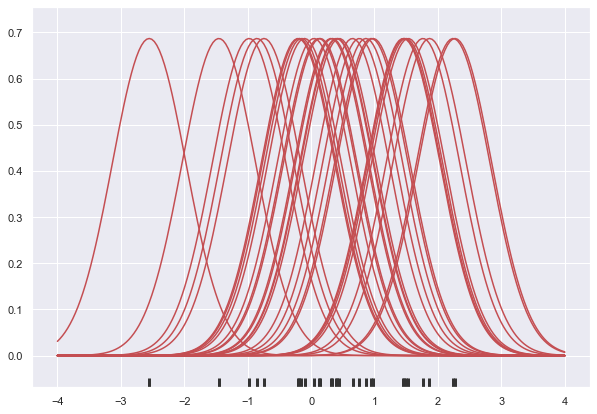

In [107]:
plt.rcParams['figure.figsize']=(10,7)
kernels = []
# 각 데이터별로 커널함수 그리기
for x_i in x: # x는 30개 -> x_i는 개별 관측값
    kernel = stats.norm(x_i, bandwidth).pdf(support) # norm(정규분포) -> pdf(확률밀도함수) 반환
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
# rugplot은 그래프에서 아래 검은색 부분만 그린다. 각 검은색 부분은 각 커널밀도함수의 평균(꼭대기부분)을 의미한다.
sns.rugplot(x, color=".2", linewidth=3);

In [54]:
# 각 커널함수들은 kernels에 리스트로 모두 존재
print(f"커널 함수 개수: {len(kernels)}")
print(f"커널함수 한 개당 값의 개수: {len(kernels[0])}")

커널 함수 개수: 30
커널함수 한 개당 값의 개수: 200


#### 커널함수 합하여 KDE 함수 생성

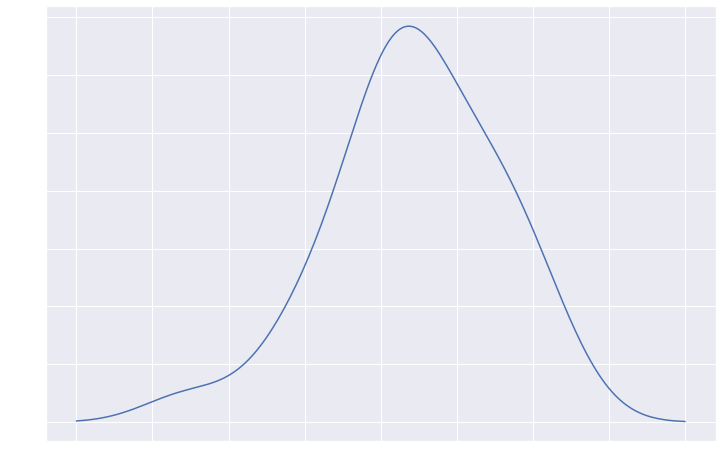

In [88]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0) # 커널함수 모두 더하고
# 커널함수를 다 더한 density의 면적으로 density를 나눈다 -> 전체 면적이 1이되도록 정규화
density /= trapz(density, support) # 나눠서 -> KDE 함수 만들기
plt.plot(support, density)
## -> displot은 히스토그램, kde, rug까지 한번에 그릴 수 있는 플랏

##### trapz: 구분구적법
<img src=https://blog.kakaocdn.net/dn/dS5Yot/btrFLBF5dP4/OqNlomUB465r8RoGOfHtr0/img.png width=500>

In [64]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
trapz(density, support) # trapz: 사다리꼴 수치 적분 -> 면적 구하기

29.99071526337815

In [77]:
len(density),len(support)

(200, 200)

In [86]:
trapz(x=[0,1],y=[0,1])

0.5

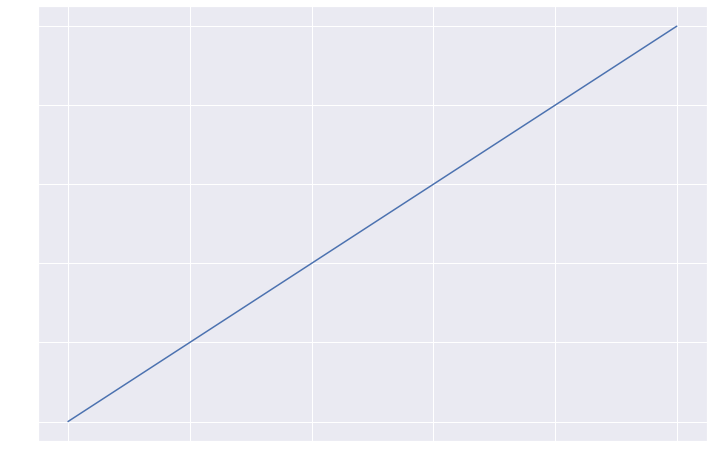

In [87]:
plt.plot([0,1],[0,1])
plt.show()

### **seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음**

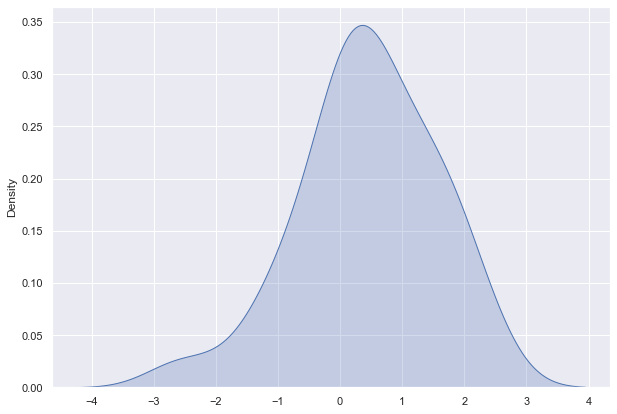

In [32]:
# KDE 곡선만 그리는 플랏
sns.kdeplot(x, shade=True);

### Bandwith(h:표준편차)에 따른 KDE

<img src=https://blog.kakaocdn.net/dn/cpFjMa/btrFz9JPfFf/af8vYajnez2eenFFylUtx0/img.png width=1000>

bandwith(h)는 표준편차로 작으면 좁은 정규분포(뾰족한)가 만들어지고, 크면 넓은 정규분포(둥근)가 만들어진다.

    - 작은 h는 좁고 변동성이 큰 확률밀도함수를 추정(오버피팅)
    - 큰 h는 Smoothing한 단순한 확률밀도함수를 추정(언더피팅)

#### **bandwidth에 따른 KDE 변화**

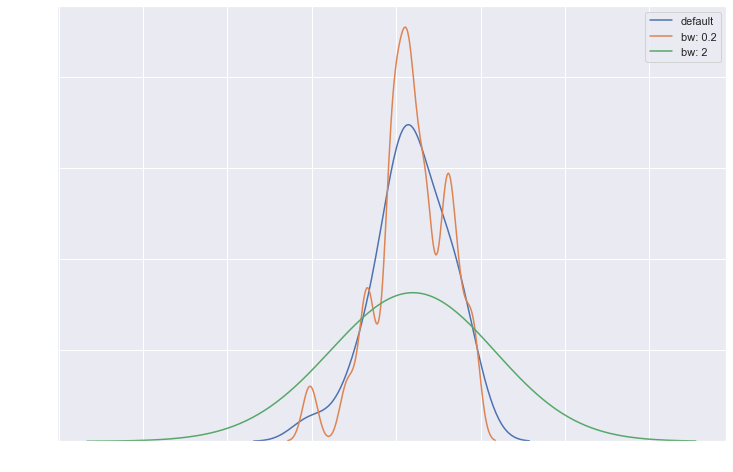

In [90]:
# kdeplot은 bandwith에 따른 kde 그래프를 볼 수 있다.
sns.kdeplot(x, label='default') # 디폴트 -> bw_method - scott -> scott 방식으로 어느정도 optimum bandwidth를 사용
sns.kdeplot(x, bw=0.2, label="bw: 0.2") # 작게 줬을때 -> 오버피팅
sns.kdeplot(x, bw=2, label="bw: 2") # 크게 줬을때 -> 언더피팅
plt.legend();

## Mean Shift
: 개별 데이터들로 부터 KDE를 이용하여 군집 중심점을 찾는 군집화 방법. 
<br>
<img src=https://blog.kakaocdn.net/dn/pXQpQ/btrFzRWXWQW/WFGgWnTQBvnHROzKYhIIF0/img.png width=1000>

<img src=https://blog.kakaocdn.net/dn/bUMPKt/btrFADcP8AF/BWAlAbfV5PtVCkkuyMqkZk/img.png width=1000>

### 사이킷런을 이용한 Mean Shift 

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [91]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


In [95]:
X.shape, y.shape

((200, 2), (200,))

#### **커널함수의 bandwidth크기를 1로 증가 -> Mean Shift 군집화**
위에서 bandwidth가 0.9일 때, 클러스터 라벨이 8개로 너무 많아서 1로 증가후 군집화 재수행

In [37]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


#### estimate_bandwidth(): 최적 bandwidth 찾기
**최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [41]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.25) # quantile: 
print('estimate_bandwidth 값(최적 bandwidth):', round(bandwidth,3))

estimate_bandwidth 값(최적 bandwidth): 1.689


##### quantile 이란?
: 최적의 bandwidth를 찾을 때, KNN을 수행하는데 이때 사용되는 서브 샘플의 비율<br>
-> quantile이 크면 banwidth 값도 커지고, quantile이 작으면 bandwidth 값도 작아진다.<br>
<img src=https://blog.kakaocdn.net/dn/pNlYJ/btrFOwRA45Y/0GGvmOZijNZ5OAHasggKmk/img.png width=650>

In [111]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)
print(f"bandwidth 최적값: {best_bandwidth:.3f}")
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels)) 

bandwidth 최적값: 1.689
cluster labels 유형: [0 1 2]


In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

## 그래프 스타일 설정
plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white';plt.rcParams['axes.labelsize']= 17
plt.rcParams['axes.titlecolor']= 'white';plt.rcParams['axes.titlesize']= 20
plt.rcParams['figure.figsize'] = (12,8)

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels) # 0, 1, 2
markers=['o', 's', '^', 'x', '*']

In [99]:
clusterDF.head(3)

,ftr1,ftr2,target,meanshift_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


In [112]:
unique_labels

array([0, 1, 2])

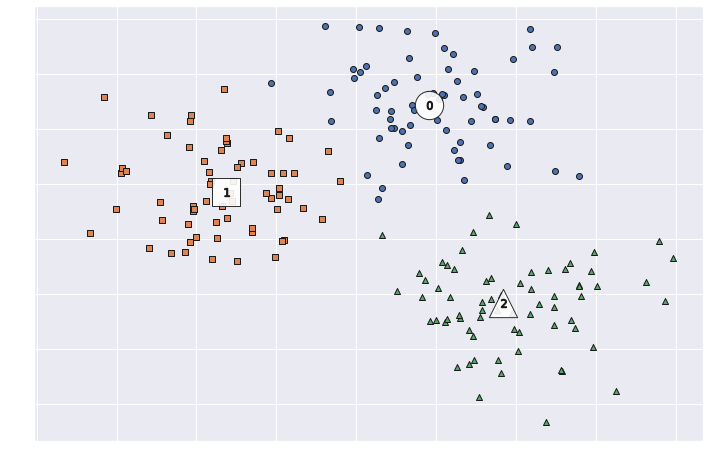

In [51]:
for label in unique_labels:
    # meanshift_label 별로 클러스터링
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=800, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [16]:
## MeanShift 군집화가 얼마나 잘 맞췄는지 확인 -> 1개 틀리고 다 맞췄다.
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       1                  67
1       2                  67
2       0                  65
        2                   1
Name: meanshift_label, dtype: int64
